# Count q values

In [6]:
import sys
sys.path = ['/nfs/gns/homes/willj/anaconda3/envs/GTEx/lib/python3.5/site-packages'] + sys.path
# sys.path = ['/hps/nobackup/research/stegle/users/willj/GTEx/deps/qvalue/qvalue'] + sys.path
import pickle
import math
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import pearsonr
import os
%matplotlib inline
import qvalue
import seaborn

In [3]:
component = 5
tissue = 'Lung'

# 'data/processed/association_results/expression/inception_50_-1.h5/Lung/mean/component1_sh{}_fl0.py'.format(component)
real_pvalues = np.array(pickle.load(open('../data/processed/association_results/expression/inception_50_-1.h5/small/{}/mean/pvalues/component{}_sh0_fl0.py'.format(tissue,component),'rb'))[1])
shuffled_data = pickle.load(open('../data/processed/association_results/expression/inception_50_-1.h5/small/{}/mean/pvalues/component{}_sh1_fl0.py'.format(tissue,component),'rb'))
shuffled_idx = np.array(shuffled_data[0])
shuffled_pvalues = np.array(shuffled_data[1])
[X_matrix, y_pheno] = pickle.load(open('../data/processed/association_data/expression/inception_50_-1.h5/small/{}/X_y_mean'.format(tissue),'rb'))

In [7]:


all_real_pvalues = []
all_shuffled_pvalues= []

for c in range(1024):
    if c%50 == 0:
        print (c)
    real_pvalues = np.array(pickle.load(open('../data/processed/association_results/expression/inception_50_-1.h5/small/{}/mean/pvalues/component{}_sh0_fl0.py'.format(tissue,c),'rb'))[1])
    shuffled_data = pickle.load(open('../data/processed/association_results/expression/inception_50_-1.h5/small/{}/mean/pvalues/component{}_sh1_fl0.py'.format(tissue,c),'rb'))
    shuffled_pvalues = np.array(shuffled_data[1])
    
    all_real_pvalues.append(list(real_pvalues))
    all_shuffled_pvalues.append(list(shuffled_pvalues))

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000


In [12]:
all_real_pvalues.flatten()

array([ 0.39488147,  0.84285528,  0.84936085, ...,  0.20923839,
        0.04969825,  0.4337221 ])

In [9]:
all_real_pvalues = np.array(all_real_pvalues).flatten()
all_shuffled_pvalues = np.array(all_shuffled_pvalues).flatten()

sorted_real_indexes = np.argsort(all_real_pvalues)
sorted_real_pvalues = all_real_pvalues[sorted_real_indexes]
sorted_shuffled_indexes = np.argsort(all_shuffled_pvalues)
sorted_shuffled_pvalues = all_shuffled_pvalues[sorted_shuffled_indexes]


sample_real = sorted_real_pvalues
expected_real = np.linspace(1/len(sorted_real_pvalues), 1, len(sorted_real_pvalues))
sample_shuffle = sorted_shuffled_pvalues
expected_shuffle = np.linspace(1/len(sorted_shuffled_pvalues), 1, len(sorted_shuffled_pvalues))

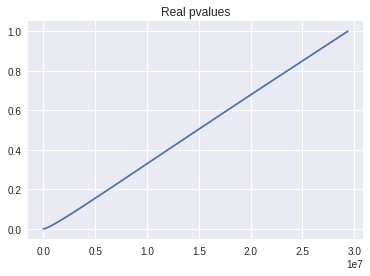

In [11]:
plt.plot(sample_real)
# a[3].plot(np.linspace(0,8,100), np.linspace(0,8,100),c='red')
plt.title('Real pvalues')

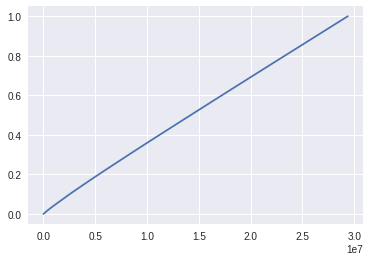

In [12]:
plt.plot(sample_shuffle)

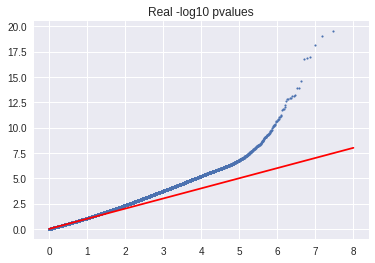

In [ ]:
plt.scatter([-math.log(x,10) for x in expected_real], [-math.log(x,10) for x in sample_real], s=3)
plt.plot(np.linspace(0,8,100), np.linspace(0,8,100), c='red')
plt.title('Real -log10 pvalues')

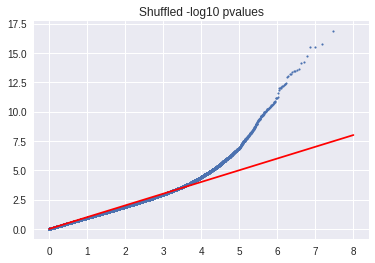

In [15]:
plt.scatter([-math.log(x,10) for x in expected_shuffle], [-math.log(x,10) for x in sample_shuffle], s=3)
plt.plot(np.linspace(0,8,100), np.linspace(0,8,100), c='red')
plt.title('Shuffled -log10 pvalues')

KeyboardInterrupt: 

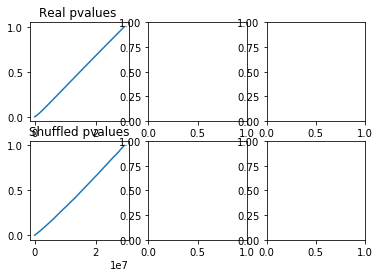

In [15]:



a[1][1].scatter([-math.log(x, 10) for x in expected_shuffle], [-math.log(x,10) for x in sample_shuffle], s=3)
a[1][1].plot(np.linspace(0,8,100), np.linspace(0,8,100),c='red')
a[1][1].set_title('Shuffled -log10 pvalues')

# a[0][0].hist(sample_real,bins=50)
# a[0][0].set_title('Real pvalues histogram')
# a[1][0].hist(sample_shuffle,bins=50)
# a[1][0].set_title('Shuffled pvalues histogram')